# 第3章　簡単なサンプルで学ぶTensorFlowの基本

In [1]:
# Ubuntu環境の場合は以下のコマンドで IPAexGothicを入れることができる
!apt-get install  -y fonts-ipaexfont
# フォントのキャッシュを削除
!rm ~/.cache/matplotlib/fontList.json

'apt-get' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
'rm' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


**フォントを使うには、IPAexGothicを入れた後で、一度 Kernel > Restart を実行する必要があります。なおWindows環境の場合はP.076の方法でIPAexGothicをインストールしてください。**

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

**リスト3.1:TensorFlow による1+1**

In [3]:
import tensorflow as tf


a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

with tf.Session() as sess:
    print(sess.run(c))

C:\Users\miyakoshi\Anaconda3\envs\KS\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2


**リスト3.2:演算結果の型を調べる**

In [4]:
import tensorflow as tf


a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

print(c)

Tensor("add_1:0", shape=(), dtype=int32)


In [5]:
# リスト3.3の結果がわかりづらくならいよう、グラフをリセットする
tf.reset_default_graph()

**リスト3.3:データフロ ーグラフの 定義の表示。出力を見ると、aやaddがノードとな っていることがわかる**

In [6]:
import tensorflow as tf


a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

graph = tf.get_default_graph()
print(graph.as_graph_def())

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "add"
  op: "Add"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
versions {
  producer: 24
}



**リスト3.4:変数の例**

In [7]:
import tensorflow as tf


a = tf.Variable(1, name='a')
b = tf.constant(1, name='b')
c = tf.assign(a, a + b)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('一回目: [c, a] =', sess.run([c, a]))
    # 変数 c が更新されている
    print('二回目: [c, a] =', sess.run([c, a])) 

一回目: [c, a] = [2, 2]
二回目: [c, a] = [3, 3]


**リスト3.5:プレースホルダーの例**

In [8]:
import tensorflow as tf


a = tf.placeholder(dtype=tf.int32, name='a')
b = tf.constant(1, name='b')
c = a + b

with tf.Session() as sess:
    print('a + b =', sess.run(c, feed_dict={a: 1}))

a + b = 2


**リスト3.6:演算の例**

In [9]:
import tensorflow as tf


a = tf.constant(2, name='a')
b = tf.constant(3, name='b')
c = tf.add(a, b)  # a + b と等価
d = tf.multiply(a, b)  # a*b と等価

with tf.Session() as sess:
    print('a + b = ', sess.run(c))
    print('a * b = ', sess.run(d))

a + b =  5
a * b =  6


**リスト3.7:ベクトル演算の例**

In [10]:
import tensorflow as tf


a = tf.constant([1, 2, 3], name='a')
b = tf.constant([4, 5, 6], name='b')
c = a + b

with tf.Session() as sess:
    print('a + b = ', sess.run(c))

a + b =  [5 7 9]


**リスト3.8:行列演算の例**

In [11]:
import tensorflow as tf


a = tf.constant([[1, 2], [3, 4]], name='a')
b = tf.constant([[1], [2]], name='b')
c = tf.matmul(a, b)

print('shape of a: ', a.shape)
print('shape of b: ', b.shape)
print('shape of c: ', c.shape)

with tf.Session() as sess:
    print('a = \n', sess.run(a))
    print('b = \n', sess.run(b))
    print('c = \n', sess.run(c))

shape of a:  (2, 2)
shape of b:  (2, 1)
shape of c:  (2, 1)
a = 
 [[1 2]
 [3 4]]
b = 
 [[1]
 [2]]
c = 
 [[ 5]
 [11]]


**リスト3.9:テンソルのプ レースホルダーと未知の次元**

In [12]:
import tensorflow as tf

a = tf.placeholder(shape=(None, 2), dtype=tf.int32, name='a')

with tf.Session() as sess:
    print('-- [[1, 2]]を代入 --')
    print('a = ', sess.run(a, feed_dict={a: [[1, 2]]}))
    print('\n-- [[1, 2], [3, 4]]を代入 --')
    print('a = ', sess.run(a, feed_dict={a: [[1, 2], [3, 4]]}))

-- [[1, 2]]を代入 --
a =  [[1 2]]

-- [[1, 2], [3, 4]]を代入 --
a =  [[1 2]
 [3 4]]


**リスト3.10:セッションが変わると、変数が初期化されてしまう**

In [13]:
import tensorflow as tf


a = tf.Variable(1, name='a')
b = tf.assign(a, a + 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('一回目 b = ', sess.run(b))
    print('二回目 b = ', sess.run(b))

# セッションが変わると元の値に戻ってしまう
with tf.Session() as sess:
    print('-- 新しいセッション --')
    sess.run(tf.global_variables_initializer())
    print('一回目 b = ', sess.run(b))
    print('二回目 b = ', sess.run(b))

一回目 b =  2
二回目 b =  3
-- 新しいセッション --
一回目 b =  2
二回目 b =  3


**リスト3.11:Saver による変数の保存**

In [14]:
import tensorflow as tf


a = tf.Variable(1, name='a')
b = tf.assign(a, a + 1)

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(b))
    print(sess.run(b))
    # 変数の値を model/model.ckpt に保存する
    saver.save(sess, 'model/model.ckpt')

# Saver を利用すると
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # model/model.ckpt から変数の値をリストアする
    saver.restore(sess, save_path='model/model.ckpt')
    print(sess.run(b))
    print(sess.run(b))

2
3
INFO:tensorflow:Restoring parameters from model/model.ckpt
4
5


**リスト3.12:サマリの書き出し**

In [15]:
import tensorflow as tf


LOG_DIR = './logs'

a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

LOG_DIRの確認

In [16]:
!ls ./logs

'ls' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


**リスト3.13:最急降下法による２次関数の最小化**

In [17]:
import tensorflow as tf


# パラメータは変数として定義
x = tf.Variable(0., name='x')
# パラメータを使って最小化したい関数を定義
func = (x - 1)**2

# learning_rate は一度にずらす大きさを決める
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1
) 
# train_step が x を少しずらす操作を表す
train_step = optimizer.minimize(func)

# train_step を繰り返し実行する
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20):
        sess.run(train_step)
    print('x = ', sess.run(x))

x =  0.98847073


**リスト3.14:Bos ton house -pricesデ ータセ ットのダウンロ ード**

In [18]:
# TensorFlow r1.5.0 では、Kerasのバグのためエラーとなる
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

上記のデータセットは、もう1つのkeras実装を使うことでダウンロードできます。誌面ではpip install kerasを利用した方法を紹介しています。以下のコマンドでもインストールできます。

In [19]:
!pip install keras

**リスト3.15:Kerasのインポート**

In [20]:
import keras


(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

Using TensorFlow backend.


**リスト3.16:ヒストグラムを表示**

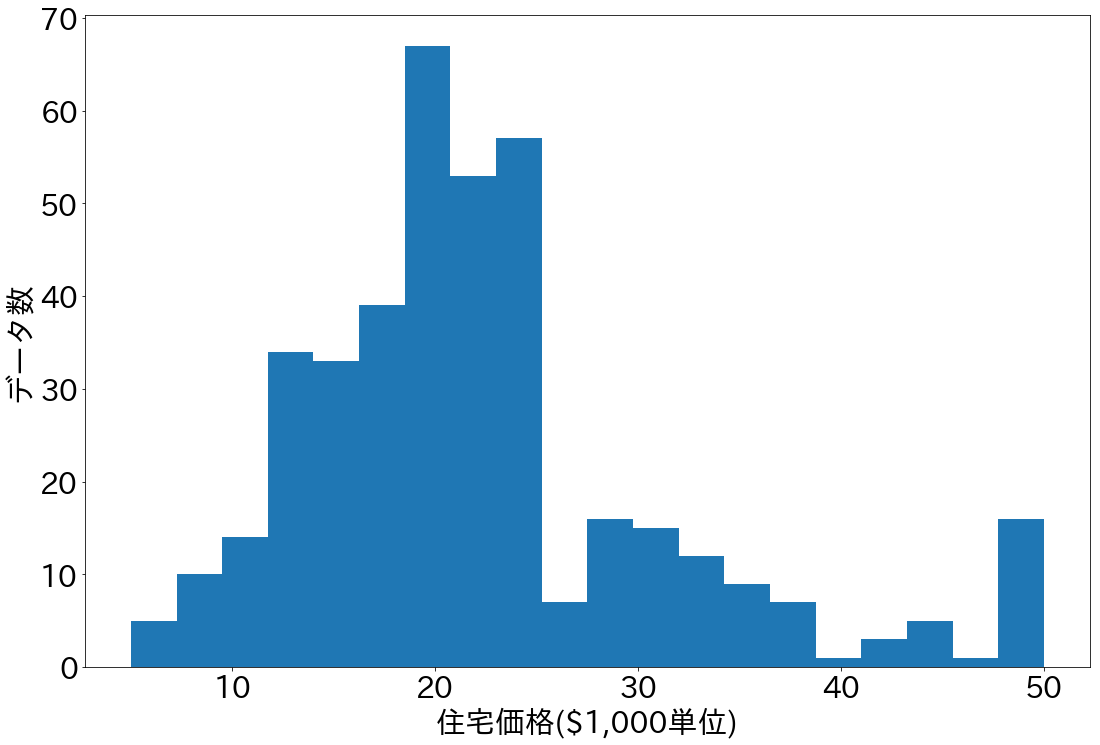

Text(0,0.5,'住宅価格($1,000単位)')

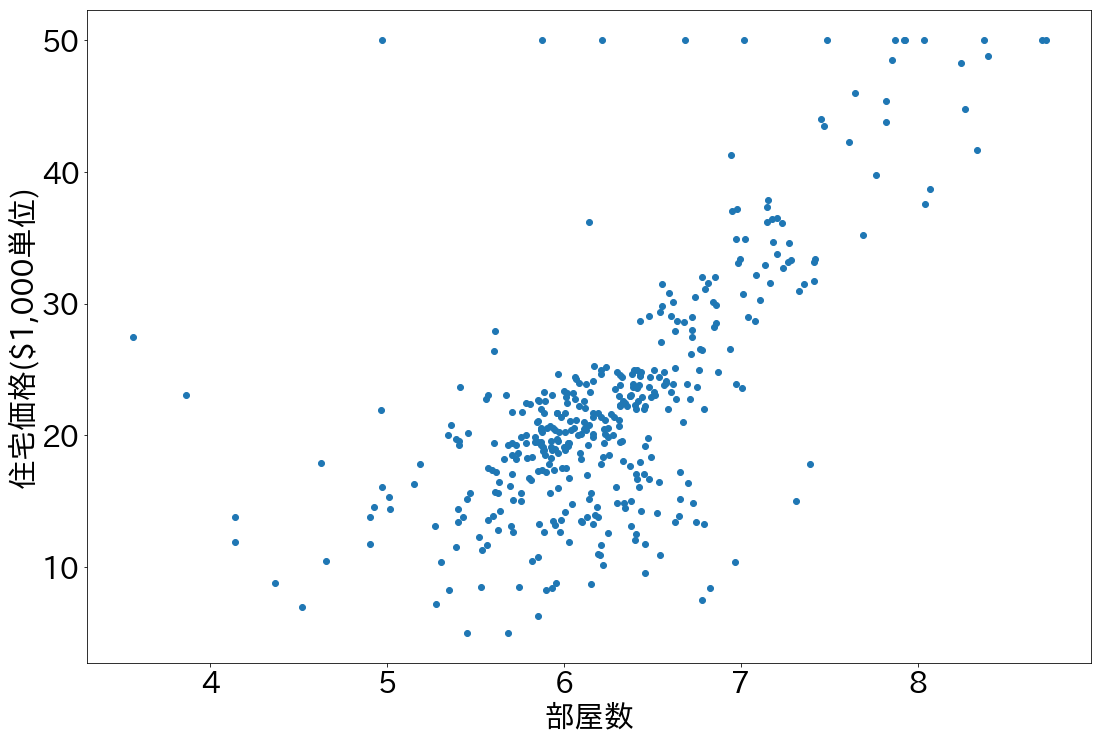

In [21]:
# matplotlibのグラフをインラインで表示する
%matplotlib inline

import matplotlib.pyplot as plt


plt.rcParams['font.family'] = ['IPAexGothic']
plt.rcParams['font.size'] = 10*3
plt.rcParams['figure.figsize'] = [18, 12]

plt.hist(y_train, bins=20)
plt.xlabel('住宅価格($1,000単位)')
plt.ylabel('データ数')
plt.show()
plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('部屋数')
plt.ylabel('住宅価格($1,000単位)')

**リスト3.17:データの 標準化**

Text(0,0.5,'住宅価格(標準化後)')

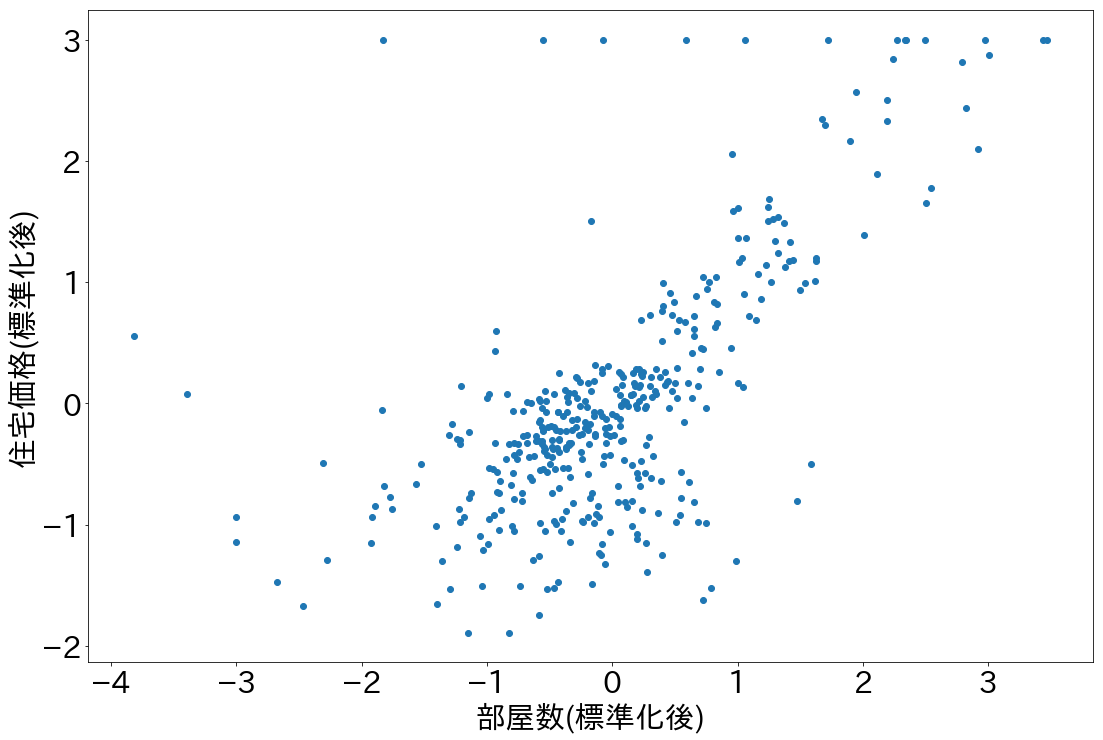

In [22]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean()
y_train_std = y_train.std()

x_train = (x_train - x_train_mean)/x_train_std
y_train = (y_train - y_train_mean)/y_train_std
# x_test に対しても x_train_mean と x_train_std を使う
x_test = (x_test - x_train_mean)/x_train_std
# y_test に対しても y_train_mean と y_train_std を使う
y_test = (y_test - y_train_mean)/y_train_std


plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('部屋数(標準化後)')
plt.ylabel('住宅価格(標準化後)')

**リスト3.18:住宅価格を推定するモデル**

In [23]:
# 説明変数用のプレースホルダー
x = tf.placeholder(tf.float32, (None, 13), name='x')
# 正解データ(住宅価格)用のプレースホルダー
y = tf.placeholder(tf.float32, (None, 1), name='y')

# 説明変数を重み w で足し合わせただけの簡単なモデル
w = tf.Variable(tf.random_normal((13, 1)))
pred = tf.matmul(x, w)

**リスト3.19:誤差の定義とtrain_stepの定義**

In [24]:
# 実データと推定値の差の二乗の平均を誤差とする
loss = tf.reduce_mean((y - pred)**2)
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1
)
train_step = optimizer.minimize(loss)

**リスト3.20:学習のル ープ**

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        # train_step が None を返すので、 _ で受けておく
        train_loss, _ = sess.run(
            [loss, train_step],
            feed_dict={
                x: x_train,
                # y_trainとyの次元を揃えるためにreshapeが必要
                y: y_train.reshape((-1, 1))
            }
        )
        print('step: {}, train_loss: {}'.format(
            step, train_loss
        ))

    # 学習が終わったら、評価用データに対して予測してみる
    pred_ = sess.run(
        pred,
        feed_dict={
            x: x_test
        }
    )

step: 0, train_loss: 13.650951385498047
step: 1, train_loss: 3.3175270557403564
step: 2, train_loss: 2.1055731773376465
step: 3, train_loss: 1.6368244886398315
step: 4, train_loss: 1.3534704446792603
step: 5, train_loss: 1.167392611503601
step: 6, train_loss: 1.0399926900863647
step: 7, train_loss: 0.9491638541221619
step: 8, train_loss: 0.881722629070282
step: 9, train_loss: 0.8296720385551453
step: 10, train_loss: 0.7880745530128479
step: 11, train_loss: 0.7538163065910339
step: 12, train_loss: 0.7248855233192444
step: 13, train_loss: 0.6999463438987732
step: 14, train_loss: 0.6780856251716614
step: 15, train_loss: 0.6586610674858093
step: 16, train_loss: 0.6412070989608765
step: 17, train_loss: 0.6253775954246521
step: 18, train_loss: 0.6109085083007812
step: 19, train_loss: 0.5975942611694336
step: 20, train_loss: 0.5852722525596619
step: 21, train_loss: 0.5738107562065125
step: 22, train_loss: 0.5631024241447449
step: 23, train_loss: 0.5530588030815125
step: 24, train_loss: 0.5436

**図3.12:評価用データに対する実測値と推定値**

Text(0,0.5,'住宅価格(標準化後)')

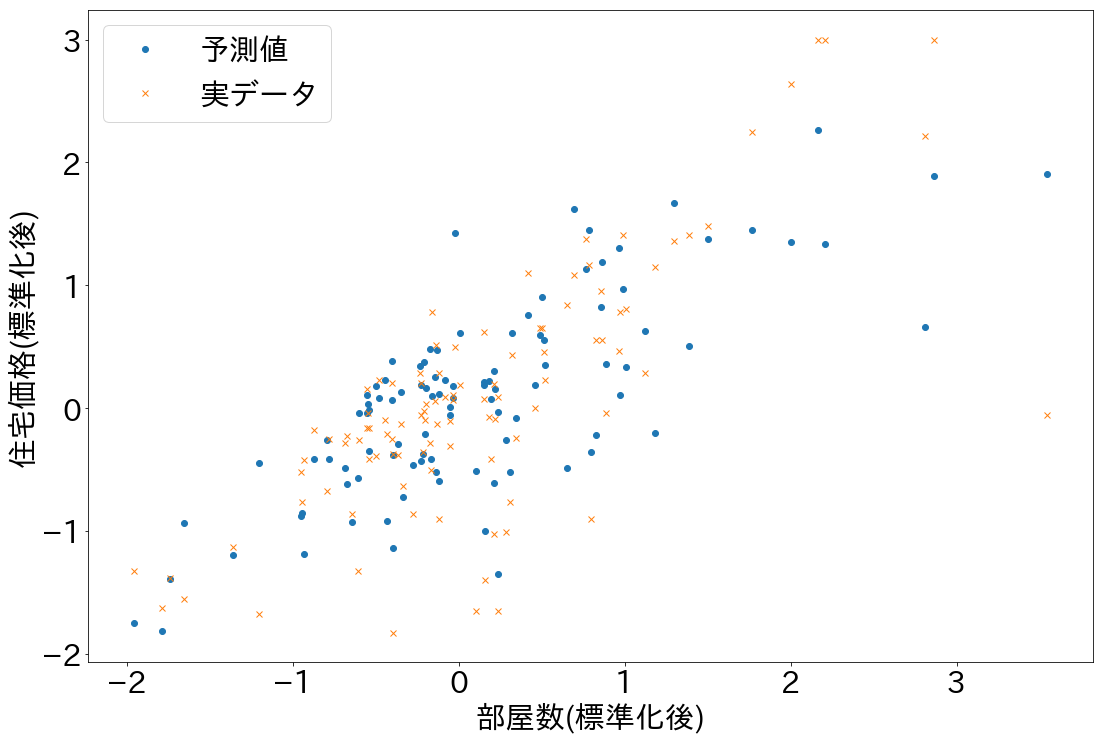

In [26]:
plt.plot(x_test[:, 5], pred_, 'o', label='予測値')
plt.plot(x_test[:, 5], y_test, 'x', label='実データ')
plt.legend(loc='upper left')
plt.xlabel('部屋数(標準化後)')
plt.ylabel('住宅価格(標準化後)')

**リスト3.21:ミニバッチを1つずつ返すジェネレータ**

In [27]:
import numpy as np


def get_batches(x, y, batch_size):
    n_data = len(x)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    # 元データからランダムに batch_size 個ずつ抽出する
    for i in range(0, n_data, batch_size):
        x_batch = x_shuffled[i: i + batch_size]
        y_batch = y_shuffled[i: i + batch_size]
        yield x_batch, y_batch

**リスト3.22:ミニバッチを用いた学習**

In [28]:
# ミニバッチのサイズ
BATCH_SIZE = 32

step = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 100エポック回す
    for epoch in range(100):
        for x_batch, y_batch in get_batches(x_train, y_train, 32):
            train_loss, _ = sess.run(
                [loss, train_step],
                feed_dict={
                    x: x_batch,
                    y: y_batch.reshape((-1, 1))
                }
            )
            print('step: {}, train_loss: {}'.format(
                step, train_loss
            ))
            step += 1
    
    pred_ = sess.run(
        pred,
        feed_dict={
            x: x_test
        }
    )

step: 0, train_loss: 9.742149353027344
step: 1, train_loss: 7.045164585113525
step: 2, train_loss: 4.47187614440918
step: 3, train_loss: 4.923813819885254
step: 4, train_loss: 6.007293701171875
step: 5, train_loss: 2.4842121601104736
step: 6, train_loss: 3.854689359664917
step: 7, train_loss: 0.8639840483665466
step: 8, train_loss: 1.7174854278564453
step: 9, train_loss: 1.4592454433441162
step: 10, train_loss: 1.9647657871246338
step: 11, train_loss: 1.326046347618103
step: 12, train_loss: 2.14467191696167
step: 13, train_loss: 0.938737690448761
step: 14, train_loss: 0.9709228277206421
step: 15, train_loss: 0.529624342918396
step: 16, train_loss: 1.89034104347229
step: 17, train_loss: 0.8615410327911377
step: 18, train_loss: 0.8829084038734436
step: 19, train_loss: 0.7687327861785889
step: 20, train_loss: 0.49167945981025696
step: 21, train_loss: 0.7754210233688354
step: 22, train_loss: 0.6223594546318054
step: 23, train_loss: 0.5275121331214905
step: 24, train_loss: 0.377599895000457

step: 367, train_loss: 0.24581018090248108
step: 368, train_loss: 0.47108593583106995
step: 369, train_loss: 0.3877979516983032
step: 370, train_loss: 0.24426457285881042
step: 371, train_loss: 0.38474783301353455
step: 372, train_loss: 0.28496235609054565
step: 373, train_loss: 0.34617382287979126
step: 374, train_loss: 0.20211291313171387
step: 375, train_loss: 0.24644865095615387
step: 376, train_loss: 0.16090063750743866
step: 377, train_loss: 0.24138130247592926
step: 378, train_loss: 0.7508807182312012
step: 379, train_loss: 0.14655545353889465
step: 380, train_loss: 0.1842559427022934
step: 381, train_loss: 0.36207878589630127
step: 382, train_loss: 0.26034751534461975
step: 383, train_loss: 0.14954619109630585
step: 384, train_loss: 0.22529521584510803
step: 385, train_loss: 0.16897538304328918
step: 386, train_loss: 0.1727653443813324
step: 387, train_loss: 0.6522061228752136
step: 388, train_loss: 0.1384202390909195
step: 389, train_loss: 0.42168816924095154
step: 390, train_

step: 789, train_loss: 0.43423354625701904
step: 790, train_loss: 0.2884212136268616
step: 791, train_loss: 0.17582328617572784
step: 792, train_loss: 0.1710638403892517
step: 793, train_loss: 0.5895472764968872
step: 794, train_loss: 0.25360405445098877
step: 795, train_loss: 0.144330233335495
step: 796, train_loss: 0.11362561583518982
step: 797, train_loss: 0.20719507336616516
step: 798, train_loss: 0.13562597334384918
step: 799, train_loss: 0.36785703897476196
step: 800, train_loss: 0.2362401783466339
step: 801, train_loss: 0.5410900115966797
step: 802, train_loss: 0.13290119171142578
step: 803, train_loss: 0.5892395377159119
step: 804, train_loss: 0.25085434317588806
step: 805, train_loss: 0.19926287233829498
step: 806, train_loss: 0.2382480800151825
step: 807, train_loss: 0.2525915801525116
step: 808, train_loss: 0.3323007822036743
step: 809, train_loss: 0.18041487038135529
step: 810, train_loss: 0.3506637513637543
step: 811, train_loss: 0.2456110119819641
step: 812, train_loss: 0

step: 1156, train_loss: 0.15346543490886688
step: 1157, train_loss: 0.12605978548526764
step: 1158, train_loss: 0.09769749641418457
step: 1159, train_loss: 0.27980688214302063
step: 1160, train_loss: 0.37660884857177734
step: 1161, train_loss: 0.2699145972728729
step: 1162, train_loss: 0.6002373099327087
step: 1163, train_loss: 0.3234702944755554
step: 1164, train_loss: 0.4998166263103485
step: 1165, train_loss: 0.2244163155555725
step: 1166, train_loss: 0.2039932906627655
step: 1167, train_loss: 0.3474380373954773
step: 1168, train_loss: 0.23250964283943176
step: 1169, train_loss: 0.3335030972957611
step: 1170, train_loss: 0.5885197520256042
step: 1171, train_loss: 0.3650902509689331
step: 1172, train_loss: 0.16106413304805756
step: 1173, train_loss: 0.27086901664733887
step: 1174, train_loss: 0.23789355158805847
step: 1175, train_loss: 0.19393952190876007
step: 1176, train_loss: 0.14840193092823029
step: 1177, train_loss: 0.4217092990875244
step: 1178, train_loss: 0.27005916833877563